# Test with new data to predict

In [1]:
import os
import librosa as lr
import librosa.display
#from librosa.display import waveplot
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import imageio
import warnings
from IPython.display import Audio

In [2]:
voice_path = 'C:/Users/filip/Documents/Ljudinspelningar/Inspelning.wav' # TODO: Adapt this folder!

sample_rate = 8000
image_width = 500
image_height = 128

In [3]:
def load_audio_file(audio_file_path):
    warnings.simplefilter('ignore', UserWarning)
    
    audio_segment, _ = lr.load(audio_file_path, sr=sample_rate)
    return audio_segment

    warnings.simplefilter('default', UserWarning)

In [4]:
def fix_audio_segment_to_10_seconds(audio_segment):
    target_len = 10 * sample_rate
    audio_segment = np.concatenate([audio_segment]*3, axis=0)
    audio_segment = audio_segment[0:target_len]
    
    return audio_segment

In [5]:
def spectrogram(audio_segment):
    # Compute mel-scaled spectrogram image
    hl = audio_segment.shape[0] // image_width
    spec = lr.feature.melspectrogram(audio_segment, n_mels=image_height, hop_length=int(hl))

    # Logarithmic amplitudes
    image = lr.core.power_to_db(spec)

    # Convert to numpy matrix
    image_np = np.asmatrix(image)

    # Normalize and scale
    image_np_scaled_temp = (image_np - np.min(image_np))
    
    image_np_scaled = image_np_scaled_temp / np.max(image_np_scaled_temp)

    return image_np_scaled[:, 0:image_width]

In [6]:
def to_integer(image_float):
    # range (0,1) -> (0,255)
    image_float_255 = image_float * 255.
    
    # Convert to uint8 in range [0:255]
    image_int = image_float_255.astype(np.uint8)
    
    return image_int

In [7]:
audio = load_audio_file(voice_path)

In [8]:
audio_fixed = fix_audio_segment_to_10_seconds(audio)

C:\Users\filip\AppData\Local\Temp/ipykernel_26332/1900841870.py:4: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00048014 -0.00046447
 -0.00038397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec = lr.feature.melspectrogram(audio_segment, n_mels=image_height, hop_length=int(hl))


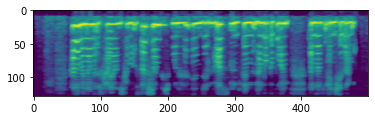

In [9]:
spectro = spectrogram(audio_fixed)

spectro.shape

plt.imshow(spectro)

In [11]:
model = tf.keras.models.load_model('../data/model.h5')